In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install ultralytics==8.2.90 mlflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 143.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 133.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 M

In [1]:
#Import Trained Model
from ultralytics import YOLO
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA available: True
Device name: Tesla T4


In [2]:
!unzip -q "/content/drive/MyDrive/MVTEC_AD.zip" -d "/content/MVTEC_AD"


In [3]:
# remove the useless macOS metadata folder
!rm -rf /content/MVTEC_AD/__MACOSX

# if your dataset got nested like /content/MVTEC_AD/MVTEC_AD/
!mv /content/MVTEC_AD/MVTEC_AD/* /content/MVTEC_AD/
!rm -rf /content/MVTEC_AD/MVTEC_AD


In [4]:
%env WANDB_DISABLED=true



env: WANDB_DISABLED=true


Upload Model YOLO (yolov8m)

In [6]:
#Training
!python /content/train.py --data /content/data.yaml --model /content/best.pt --epochs 100 --batch 16 --imgsz 640 --device 0 --project runs_yolov8 --name mvtec_finetuned --mlflow_dir /content/mlruns


Using device: Tesla T4
Starting training: model=/content/best.pt, data=/content/data.yaml, epochs=100
New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.90 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs_yolov8, name=mvtec_finetuned, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vi

In [16]:
!zip -r training_artifacts.zip runs/ mlruns/ runs_yolov8/

updating: runs/ (stored 0%)
updating: runs/yolov8/ (stored 0%)
updating: runs/yolov8/mvtec_finetuned/ (stored 0%)
updating: runs/yolov8/mvtec_finetuned/weights/ (stored 0%)
updating: runs/yolov8/mvtec_finetuned/args.yaml (deflated 52%)
updating: runs/yolov8/mvtec_finetuned/events.out.tfevents.1761977069.b3d0c178d9f9.1974.0 (deflated 9%)
updating: mlruns/ (stored 0%)
updating: mlruns/857384517416707927/ (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/ (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/tags/ (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/tags/mlflow.source.type (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/tags/mlflow.source.name (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/tags/mlflow.user (stored 0%)
updating: mlruns/857384517416707927/b1f78e9de80b48f2b39d148d29410ff1/tags/mlflow.runName (stored 0%)
upda

In [17]:
from google.colab import files
files.download("training_artifacts.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions

In [9]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs_yolov8/mvtec_finetuned/weights/best.pt")

# Run prediction on images or folder
results = model.predict(source="/content/MVTEC_AD/images/val",
                        conf=0.25,  # confidence threshold
                        save=True,  # save results with bounding boxes
                        show=False) # set True to display in notebook



image 1/978 /content/MVTEC_AD/images/val/val_00000.jpg: 640x640 1 non_defective, 37.0ms
image 2/978 /content/MVTEC_AD/images/val/val_00001.jpg: 640x640 1 non_defective, 37.0ms
image 3/978 /content/MVTEC_AD/images/val/val_00002.jpg: 640x640 1 non_defective, 36.9ms
image 4/978 /content/MVTEC_AD/images/val/val_00003.jpg: 640x640 1 non_defective, 36.2ms
image 5/978 /content/MVTEC_AD/images/val/val_00004.jpg: 640x640 1 non_defective, 29.9ms
image 6/978 /content/MVTEC_AD/images/val/val_00005.jpg: 640x640 1 non_defective, 29.8ms
image 7/978 /content/MVTEC_AD/images/val/val_00006.jpg: 640x640 1 non_defective, 29.8ms
image 8/978 /content/MVTEC_AD/images/val/val_00007.jpg: 640x640 1 non_defective, 29.9ms
image 9/978 /content/MVTEC_AD/images/val/val_00008.jpg: 640x640 1 non_defective, 28.5ms
image 10/978 /content/MVTEC_AD/images/val/val_00009.jpg: 640x640 1 non_defective, 19.0ms
image 11/978 /content/MVTEC_AD/images/val/val_00010.jpg: 640x640 1 non_defective, 18.4ms
image 12/978 /content/MVTEC_A

Prediction on single image


image 1/1 /content/MVTEC_AD/images/val/val_00032.jpg: 640x640 1 defective, 37.1ms
Speed: 3.9ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


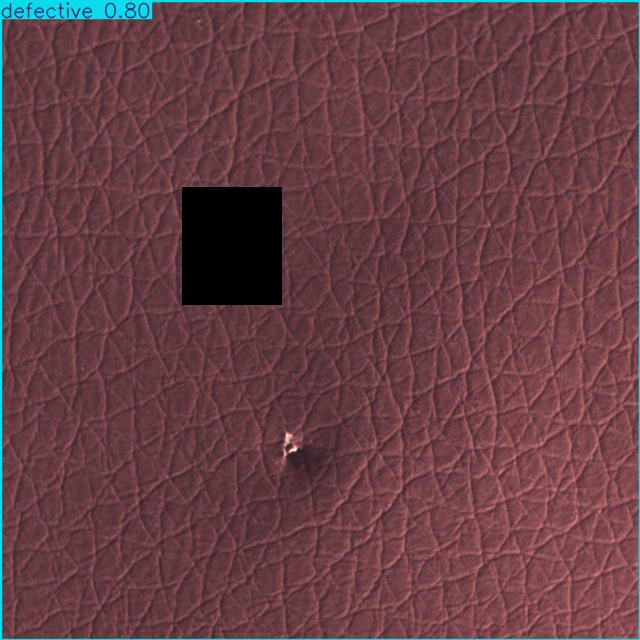

In [10]:
from IPython.display import Image, display

results = model.predict(source="/content/MVTEC_AD/images/val/val_00032.jpg", conf=0.25, save=True)
display(Image(filename='/content/runs/detect/predict/val_00032.jpg'))



image 1/1 /content/MVTEC_AD/images/val/val_00264.jpg: 640x640 1 defective, 37.0ms
Speed: 2.6ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


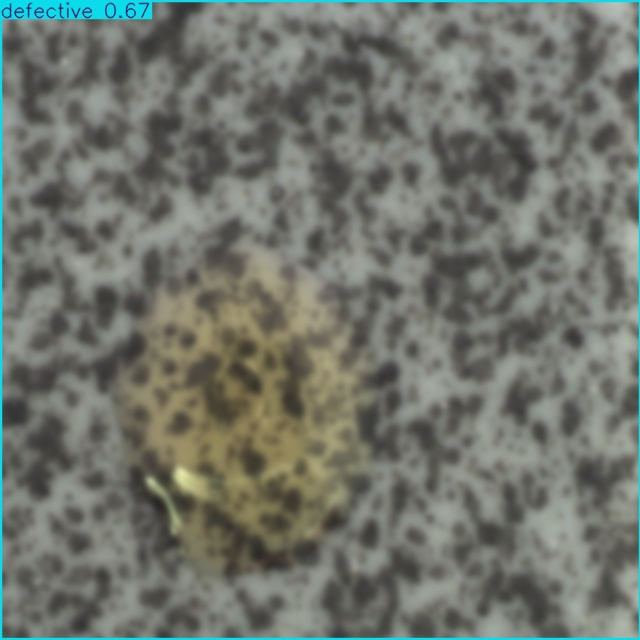

In [11]:

results = model.predict(source="/content/MVTEC_AD/images/val/val_00264.jpg", conf=0.25, save=True)
display(Image(filename='/content/runs/detect/predict/val_00264.jpg'))


image 1/1 /content/MVTEC_AD/images/val/val_00370.jpg: 640x640 1 defective, 37.1ms
Speed: 2.9ms preprocess, 37.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


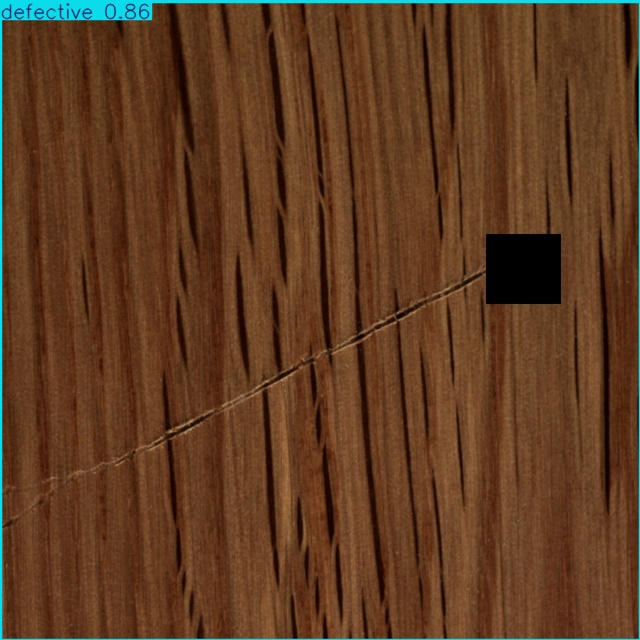

In [12]:

results = model.predict(source="/content/MVTEC_AD/images/val/val_00370.jpg", conf=0.25, save=True)
display(Image(filename='/content/runs/detect/predict/val_00370.jpg'))

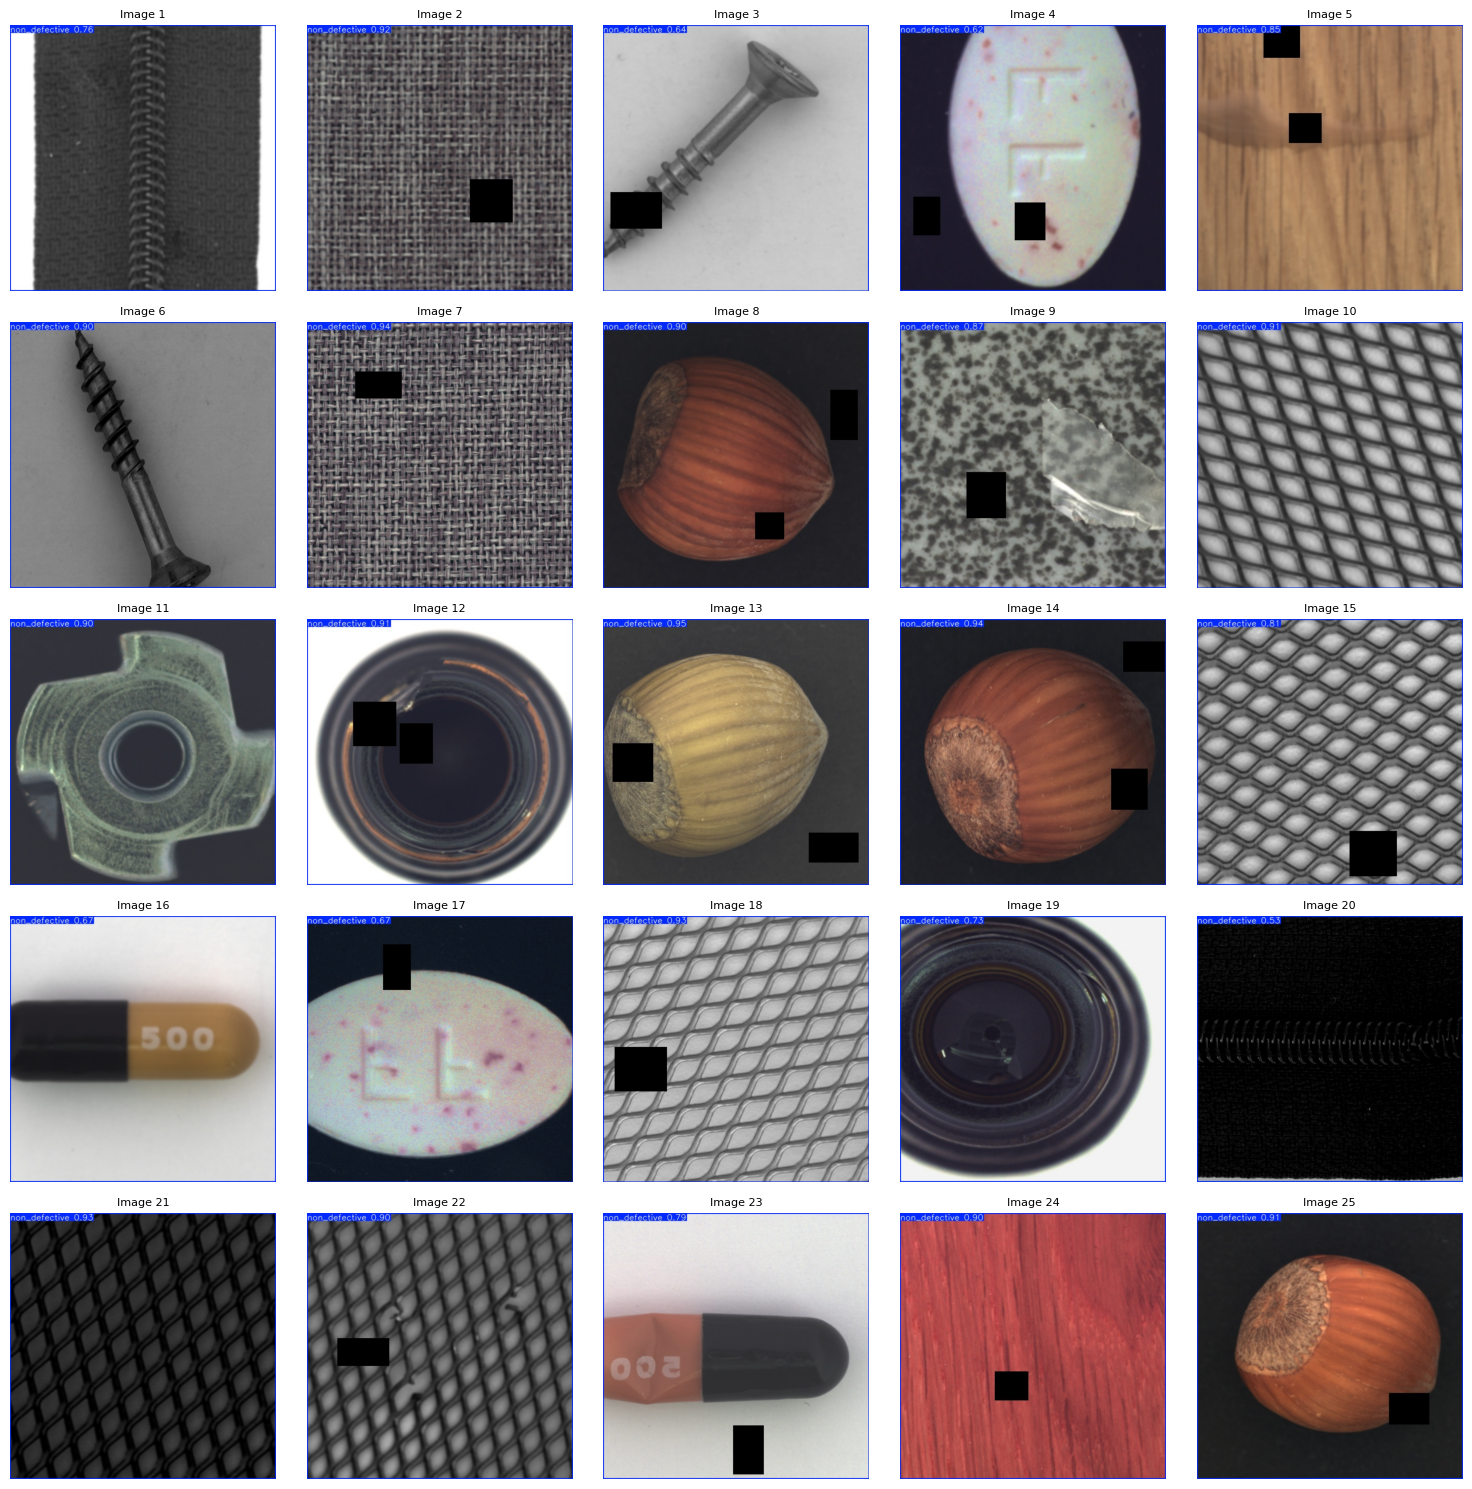

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to YOLO prediction results
pred_dir = "/content/runs/detect/predict"

# Get list of images
image_files = [os.path.join(pred_dir, f) for f in os.listdir(pred_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

image_files.sort()

# Select first 25 images
image_files = image_files[:25]

# Set up a 5x5 grid
plt.figure(figsize=(15, 15))
for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}", fontsize=8)
plt.tight_layout()
plt.show()


Inference on validation set

In [15]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs_yolov8/mvtec_finetuned/weights/best.pt")

# Evaluate on test or validation set
metrics = model.val(data="/content/data.yaml", split='val')


Ultralytics YOLOv8.2.90 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/MVTEC_AD/labels/val.cache... 978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 978/978 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


                   all        978        978      0.554       0.91      0.715      0.715
         non_defective        720        720      0.738          1      0.881      0.881
             defective        258        258      0.371       0.82      0.549      0.548
Speed: 0.5ms preprocess, 22.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
